## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


In [ ]:
%pip install pandas scikit-learn matplotlib

**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Question 1
Regression predicts a continuous numeric value by estimating a function that maps input features to real numbers. Classification predicts a discrete class label by estimating probabilities for each class. The difference is mainly the type of output. Regression outputs quantities, while classification outputs labels. Evaluation metrics differ accordingly, with regression focusing on errors like SSE or RMSE, and classification focusing on accuracy, precision, recall, and other metrics derived from the confusion matrix.

Question 3
SSE quantifies the total squared difference between observed and predicted values in regression models. A smaller SSE indicates that the model’s predictions are closer to the actual values, reflecting better fit, whereas a larger SSE indicates poor predictive accuracy. SSE helps in comparing models and assessing how well a model captures the underlying data patterns.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
k=3, MSE=147993702.19


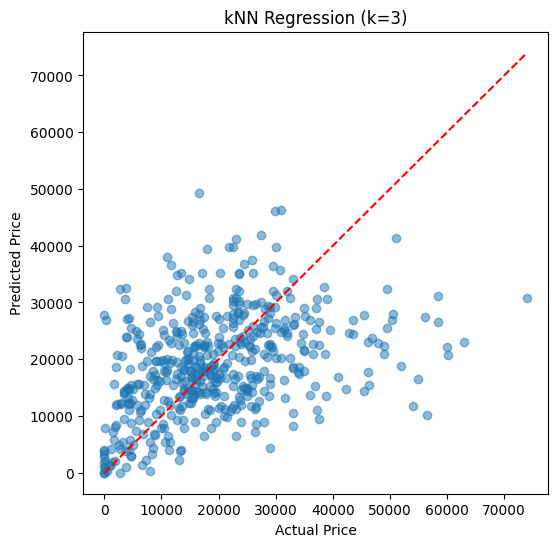

k=10, MSE=117399126.11


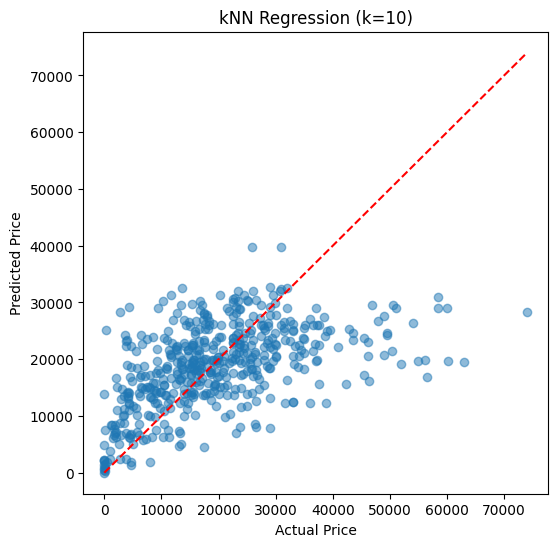

k=25, MSE=112574337.59


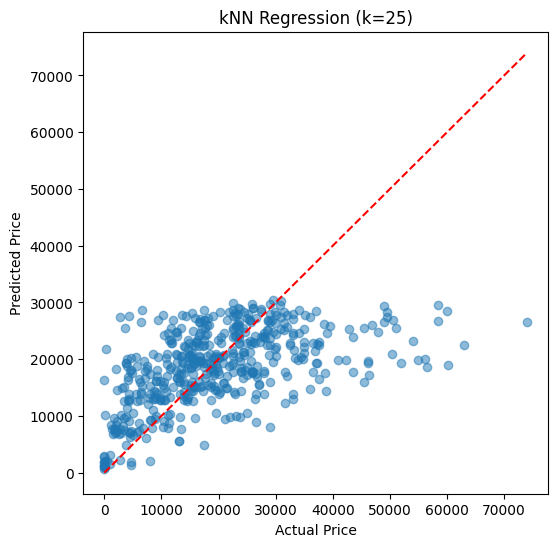

k=50, MSE=110202287.21


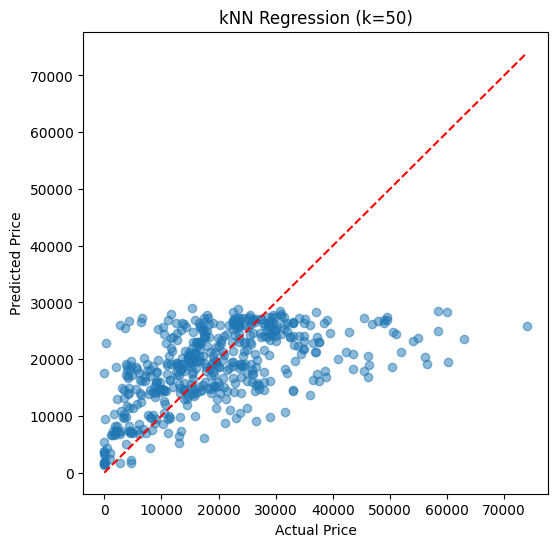

k=100, MSE=112265833.49


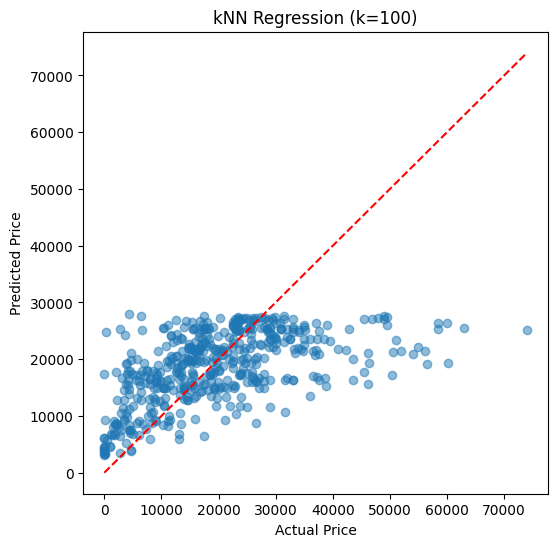

k=300, MSE=114500475.02


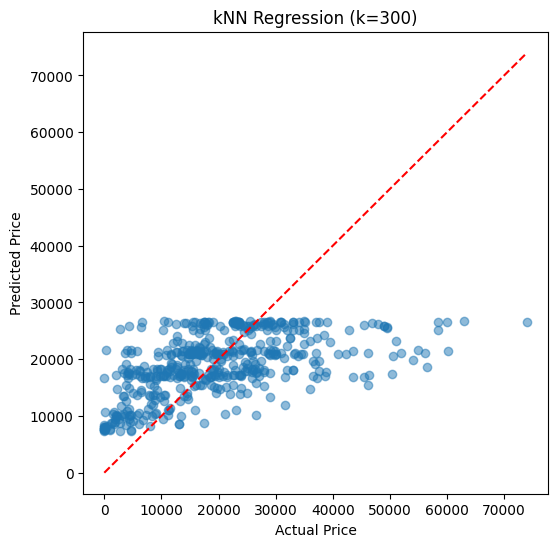

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the `./data/USA_cars_datasets.csv`
data = pd.read_csv('./data/USA_cars_datasets.csv')

# Keep the following variables and drop the rest
data = data[['price', 'year', 'mileage']]

# Check for NAs
print(data.isna().sum())

# Look at the head and dimensions of the data
print(data.head())
print(data.shape)

# Maxmin normalize `year` and `mileage`
scaler = MinMaxScaler()
data[['year', 'mileage']] = scaler.fit_transform(data[['year', 'mileage']])

# Split the sample into ~80% for training and ~20% for evaluation
X = data[['year', 'mileage']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the kNN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$
ks = [3, 10, 25, 50, 100, 300]

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"k={k}, MSE={mse:.2f}")
    
    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'kNN Regression (k={k})')
    plt.show()

# Determine the optimal k for these data
optimal_k = 25

Question 4
As k increases in kNN regression, the predictions become progressively smoother and less sensitive to individual data points. With small k values, such as 3, the model closely follows the training data, capturing local fluctuations but also noise, which can lead to overfitting and highly variable predictions. As k increases to moderate values, like 10 or 25, the model balances fitting the data with smoothing, producing predictions that more reliably follow the overall trend without being overly influenced by outliers. For very large k values, such as 100 or 300, the predictions tend to converge toward the mean of the target variable, ignoring local patterns and underfitting the data. Overall, increasing k reduces variance but increases bias, so the choice of k reflects a trade-off between overfitting and underfitting.

Question 5
optimal_k = 25

Question 6
As k varied in the kNN regression plots, the relationship between predicted and actual prices changed noticeably. For small k values, such as 3, the predictions closely tracked the actual prices, including local fluctuations and noise, resulting in points scattered tightly around the diagonal but with some extreme deviations. This reflects overfitting. At moderate k values, like 10 or 25, the predictions smoothed out noisy fluctuations while still following the general trend of the data, producing points that aligned well with the diagonal, indicating a good balance between bias and variance. For very large k values, such as 100 or 300, the predictions became overly smooth and concentrated near the mean price, failing to capture local variations, which led to a flattening effect in the scatterplots. This reflects underfitting. Overall, the plots illustrate how small k overfits the training data and large k underfits, while moderate k achieves the best generalization.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

Best k: 18


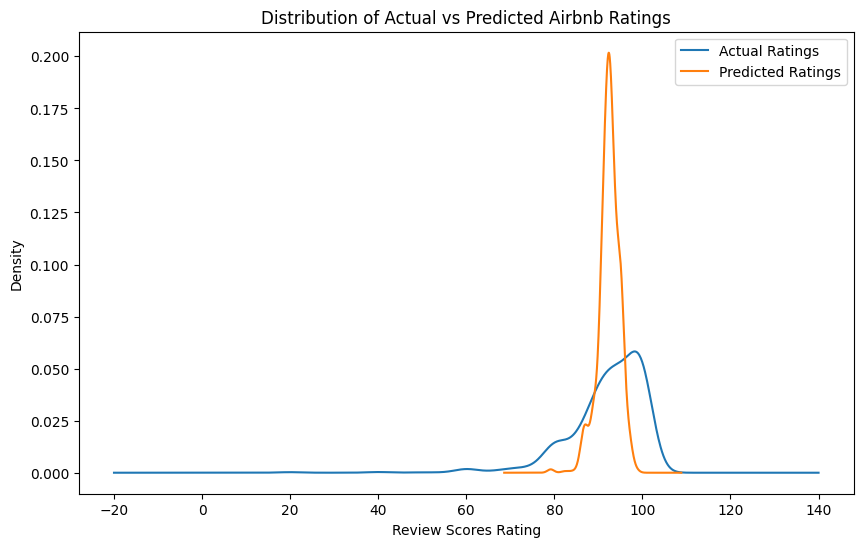

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the `airbnb_hw.csv`
df = pd.read_csv("./data/airbnb_hw.csv")

# Only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

# Convert Price to numeric by removing commas
df["Price"] = df["Price"].str.replace(",", "").astype(float)

# Convert Beds to numeric (in case there are any non-numeric values)
df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce')

# Set use `.isnull()` to select the subset of the dataframe with missing review values
missing_ratings_df = df[df["Review Scores Rating"].isnull()]

# Set those aside in a different dataframe
complete_df = df[~df["Review Scores Rating"].isnull()]

# Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe
complete_df = complete_df.dropna(axis=0, how='any')

# Create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`
X = complete_df[["Price", "Beds"]]
y = complete_df["Review Scores Rating"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over a reasonable range of k
sse_list = []
k_values = range(1, 21)  # 1 to 20 neighbors

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse = ((y_test - y_pred) ** 2).sum()
    sse_list.append(sse)

# Find best k
best_k = k_values[np.argmin(sse_list)]
print("Best k:", best_k)

# Predict the missing ratings
# Train on full complete cases with best k
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X, y)

# Clean missing predictors before prediction
X_missing = missing_ratings_df[["Price", "Beds"]].dropna()

# Predict missing ratings
predicted_ratings = final_model.predict(X_missing)

# Add predictions back to missing dataframe
missing_ratings_df.loc[X_missing.index, "Review Scores Rating"] = predicted_ratings

# Do a kernel density plot of the training ratings and the predicted missing ratings
plt.figure(figsize=(10,6))
y.plot.kde(label='Actual Ratings', bw_method=0.3)
missing_ratings_df["Review Scores Rating"].plot.kde(label='Predicted Ratings', bw_method=0.3)
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted Airbnb Ratings")
plt.legend()
plt.show()


Question 4
To choose the optimal value of k for a k-nearest neighbor regressor, we first split the complete-case dataset into a training set and a test set, typically using an 80/20 split. Then, we iterate over a range of reasonable k values, for example from 1 to 20, training a kNN model on the training set for each k and using it to predict the target variable on the test set. For each k, we calculate the sum of squared errors between the predicted and actual values in the test set. A small k can lead to overfitting, as the model may capture noise in the training data, while a large k can lead to underfitting, as the model averages over too many neighbors and smooths out meaningful variation. The value of k that minimizes the SSE on the test set represents the best balance between bias and variance and is therefore chosen as the optimal parameter for the kNN regressor.

Question 6
The predicted ratings and the actual ratings may look somewhat similar in their overall shape, but the predicted ratings are usually less variable and more concentrated around common values. This occurs because the k-nearest neighbor model predicts each missing rating as an average of its nearest neighbors, which smooths out extreme values and reduces variability. As a result, while the general distribution of predicted ratings can resemble the distribution of actual ratings, it lacks the full range of highs and lows present in the original data. This difference reflects the inherent limitation of using only Price and Beds to impute ratings. These features capture some of the variation, but not all the things that affect review scores.